<h1><center> Applied Economic Analysis: Python Assignment</center></h1>  

#### **Authors**:
|Name|SNR|ANR|
|----|---|----|
|Koen van der Blij|2068433|u866631|
|Richard Sens|2065313|u288984|

# The Effect of Covid-19 on Global Adoption of Electronic Payments

## **Research Question**
What is the effect of Covid-19 on global adoption of electronic payments?

## **Motivation**
In this assignment we study the effects of Covid-19 on financial development around the globe. We hypothesize that Covid-19 has accelerated the adoption of digital payments due to perceived infection risk from cash payments. [Dalton et al. (2020)](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj3gKHKqrT0AhWJ2aQKHUnTA5gQFnoECAYQAQ&url=https%3A%2F%2Fpure.uvt.nl%2Fws%2Fportalfiles%2Fportal%2F28111085%2F2018_042.pdf&usg=AOvVaw2tVxdGK2jSTX0CXpTSSyTu), through a case study of mobile payments in Kenya, find that cashless payments increase access to finance by building a transaction record, which can function as a signal of creditworthiness to lending institutions. In this case study, access to short-term loans already provides economic benefits by smoothing out liquidity shocks for small enterprises, which reduces their sales volatility. Similarly, [Beck et al. (2018)](https://www.sciencedirect.com/science/article/pii/S0304387818300075) find that mobile money usage has important (positive) implications for macroeconomic development. For instance, mobile money compared to fiat money not only increases access to finance, but also significantly reduces risk of theft for small businesses and individuals. We believe that the analysis performed in this assignment may reveal some meaningful new insights into the relationship between the Covid-19 pandemic and financial development around the world.
There are indeed indications that mobile money adoption has increased significantly during the pandemic. 

## **Data and Method**
### **Covid Data** 
-  confirmed Covid case data 
-  dichotomous pre- and during-Covid variable (start of 2020 is used as a rough cutoff date) 
-  population data to adjust covid cases for population size
    
### **Financial Development Data**
-  mobile and internet banking transactions 

### Method 

As a first step we clean our data. The aim here is to delete all countries with missing data so that we achieve a dataset of countries for which we have data for the mobile and internet transactions of the past 5 years, population data for 2020 and Covid data for 2020. 

We then continue by looking at the dataset to get an overview of the usage of mobile and internet banking transactions over the last 5 years as well as of the Covid severity for our observed countries measured as cases per 1,000 inhabitants. 

Our main analysis consists of  a regression analysis on the year-on-year growth of mobile and internet banking transactions against Covid. 
- Here, we first analyse how the years affected the growth rates before using Covid as a dichotomous variable being 1 in 2020 and 0 otherwise. This should allow us to observe the existence of an effect of Covid on the adoption rate of mobile money and internet banking. 
-  In our second regression, instead of a Covid dummy variable we use a continuous variable of covid severity. We do this in order to find out whether countries suffering more from Covid shifted payment behaviour towards mobile money and internet banking by regressing the growth rate against Covid severity, again, measured as cases per 1,000 inhabitants.

In every analysis, we also control for the mobile and internet banking transactions of the previous year since countries with an already high adoption of mobile money and internet banking are expected to have slower growth of adoption.

## Main assumptions

Our biggest limitation is that the Covid pandemic is still ongoing. Therefore, we cannot assess post Covid data to see whether possible effects of the pandemic are also going to affect the post Covid economy. Another issue with Covid is the reliability of the Covid data. Lower case numbers in a country might be the result of less rigorous testing. Thus, our findings regarding Covid severity might be biased. Since we cannot get access to a real state of nature, we have to assume that the Covid data reflects the real case numbers.

## Conclusion 

Using our regression analysis we do not find evidence of a significant effect of Covid on the usage of mobile money and online transactions. However, the coefficients suggest that the threat Covid could have a positive effect on the adoption of mobile and internet banking transactions but this was also an ongoing trend before Covid. The coefficients for the Covid severity however suggest that countries that faced more infections showed lower usage rates of mobile and internet banking transactions. Therefore, further research will be necessary to answer our research question. This especially becomes necessary once post-Covid economic data becomes available.

## Discussion

Our analysis could benefit from further robustness checks. This could be done by using 2021 data once the Financial Access survey for 2021 gets released or by utilising different data points that reflect the adoption of mobile money. This could, for example, be done by cooperating with mobile money providers like Safaricom in Kenya.
Another point for future research is the different effects that Covid could have had on mobile and internet banking transactions. As already discussed, there was a shift towards contactless ways of transferring money which should be reflected in an uptake of mobile and internet transactions. However, there is also a potential negative effect on adoption, because Covid led to less economic activity in many parts of the world. This means that countries with previously high rates of usage of mobile money and internet banking could have had negative growth rates due to overall decline in transactions. This could possibly be controlled for by also including the total number of transactions or the GDP growth as a proxy for changes in economic activity.

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import pypopulation
from datetime import datetime
from covid19dh import covid19
import time
import statsmodels.formula.api as sm
import warnings
import pycountry_convert as pc
import statistics
warnings.filterwarnings('ignore')

### Covid Data
[Python Interface to COVID-19 Data Hub](https://pypi.org/project/covid19dh/) is used to import Covid data

In [2]:
#Importing Covid Data through API
x, src = covid19(["CO","AR","BE","HR","DO","AL","AF","CY","AO","BG","CV","AT","BR","EC","CM","CL","CZ","CR","BD","BW","AZ","BY","DK","BA","TD","EE","JM","HU","LU","ID","LV","FI","LB","KZ","GE","FJ","FR","LT","GH","MY","GN","LS","JO","GT","IN","KR","MW","HN","EG","GW","MG","NI","SC","MZ","SA","SI","PT","NL","MK","MN","RS","PY","PK","MM","MD","RU","WS","MV","NO","MU","MX","NA","PL","RW","NP","MR","SK","PA","SB","SE","TH","VN","ZM","TO","CH","ZW","UY","TR","SR","TN"
], start = "2020-01-01", end = "2020-12-31", verbose = False)

In [3]:
#Transforming Covid DataFrame
cols_keep = ["iso_alpha_2", 'date', 'confirmed']
df = x[cols_keep]
df["year"] = None
df["year"] = pd.DatetimeIndex(df['date']).year
key = ["unique"]

df["unique"] = df["year"].astype(str) + df["iso_alpha_2"]
df = df.set_index(key)
df = df[df['date'] == '2020-12-31']
df = df.drop(columns=["year"])
df = df.drop(columns=["date"])
df = df.reset_index()

We use the simple API [pypopulation](https://pypi.org/project/pypopulation/) to retrieve 2020 population data

In [4]:
#Importing population data for each country to account for population differences(i.e. cases/population)
params = ["CO","AR","BE","HR","DO","AL","AF","CY","AO","BG","CV","AT","BR","EC","CM","CL","CZ","CR","BD","BW","AZ","BY","DK","BA","TD","EE","JM","HU","LU","ID","LV","FI","LB","KZ","GE","FJ","FR","LT","GH","MY","GN","LS","JO","GT","IN","KR","MW","HN","EG","GW","MG","NI","SC","MZ","SA","SI","PT","NL","MK","MN","RS","PY","PK","MM","MD","RU","WS","MV","NO","MU","MX","NA","PL","RW","NP","MR","SK","PA","SB","SE","TH","VN","ZM","TO","CH","ZW","UY","TR","SR","TN"]
df_pop1 = pd.DataFrame()
for x in params: 
    df_pop2 = pd.DataFrame([[x, pypopulation.get_population(x)]], columns=["iso_alpha_2", 'pop'])
    df_pop1 = df_pop1.append(df_pop2, ignore_index=True)
df = pd.merge(df, df_pop1, on = "iso_alpha_2", how = "left")
df["caseperpop"] = df["confirmed"]/df["pop"]
df.head(4)

,unique,iso_alpha_2,confirmed,pop,caseperpop
0,2020GT,GT,138012.0,16604026,0.008312
1,2020BY,BY,194284.0,9466856,0.020523
2,2020SB,SB,17.0,669823,0.000025
3,2020CM,CM,26277.0,25876380,0.001015


### **Financial Development Data**
We use the IMF database for data on mobile and internet banking transactions usage, namely: \
'Key Indicators, Use of Financial Services, Number of mobile and internet banking transactions (during the reference year) per 1,000 adults'

<div class="alert alert-block alert-warning">
<b>Important Note:</b> the code cell below needs some time to run (approximately 1 minute), because the IMF server does not allow for more than 10 requests every 5 seconds from one user. There is a built-in timer in the loop to deal with this.
</div>

In [5]:
#Importing e-money usage data through IMF API
import time
params = ["CO","AR","BE","HR","DO","AL","AF","CY","AO","BG","CV","AT","BR","EC","CM","CL","CZ","CR","BD","BW","AZ","BY","DK","BA","TD","EE","JM","HU","LU","ID","LV","FI","LB","KZ","GE","FJ","FR","LT","GH","MY","GN","LS","JO","GT","IN","KR","MW","HN","EG","GW","MG","NI","SC","MZ","SA","SI","PT","NL","MK","MN","RS","PY","PK","MM","MD","RU","WS","MV","NO","MU","MX","NA","PL","RW","NP","MR","SK","PA","SB","SE","TH","VN","ZM","TO","CH","ZW","UY","TR","SR","TN"]
df2 = pd.DataFrame()
for x in params: 
    url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
    param = [('dataset', 'FAS'),
             ('freq', 'A'),
             ('country', x),
             ('series', 'FCMIBTA_NUM'),
             ('start', '?startPeriod=2015'),
             ('end', '?endPeriod=2020')]
    series = '.'.join([i[1] for i in param[1:4]])
    
    key = f'CompactData/{param[0][1]}/{series}{param[-1][1]}'

    # Combine API url with key specific to data request
    r = requests.get(f'{url}{key}').json()
    # data portion of results
    df1 = pd.DataFrame(r['CompactData']['DataSet']['Series'])
    df1 = pd.concat([df1.drop(['Obs'], axis=1), df1['Obs'].apply(pd.Series)], axis=1)
    df2 = df2.append(df1, ignore_index=True)
    time.sleep(.55)
    #print("Printed after .55 seconds.")
df2.head(4)

,@FREQ,@REF_AREA,@INDICATOR,@UNIT_MULT,@TIME_FORMAT,@TIME_PERIOD,@OBS_VALUE,0
0,A,CO,FCMIBTA_NUM,0,P1Y,2008,15670.416127633,NaN
1,A,CO,FCMIBTA_NUM,0,P1Y,2009,19036.1565858351,NaN
2,A,CO,FCMIBTA_NUM,0,P1Y,2010,22845.7931691446,NaN
3,A,CO,FCMIBTA_NUM,0,P1Y,2011,25145.2556527334,NaN


In [6]:
#Filter necessary IMF data and rename columns
df2 = df2.rename(columns = {'@REF_AREA':'iso_alpha_2'})
df2 = df2.rename(columns = {'@TIME_PERIOD':'year'})
key = ["unique"]

df2["unique"] = df2["year"].astype(str) + df2["iso_alpha_2"]
df2 = df2.set_index(key)
df2 = df2.drop(columns=['@FREQ','@UNIT_MULT',"@TIME_FORMAT", "@INDICATOR", 0])
df2 = df2.rename(columns = {'@OBS_VALUE':'FCMIBTA_NUM'})
df2.head(4)

,iso_alpha_2,year,FCMIBTA_NUM
unique,,,
2008CO,CO,2008,15670.416127633
2009CO,CO,2009,19036.1565858351
2010CO,CO,2010,22845.7931691446
2011CO,CO,2011,25145.2556527334


In [7]:
#Merge Covid and e-money usage data
df4 = pd.merge(df, df2, on = "unique", how = "right")
df4 = df4.drop(columns="iso_alpha_2_x")
df4 = df4.rename(columns = {'iso_alpha_2_y':'country'})
df4 = df4.rename(columns = {'FCMIBTA_NUM':'mobile_money'})

#change data type for e-money
df4['mobile_money'] = pd.to_numeric(df4['mobile_money'])

#add lagged mobile money usage
df4['mobile_money_lag'] = df4['mobile_money'].shift()

In [8]:
#add growth rates for e-money usage and reduce df to full availabilty
df4['growth'] = df4['mobile_money'].pct_change()
df4['year'] = pd.to_numeric(df4['year'])
df5 = df4[df4['year'] > 2015]
df5['count'] = df5.groupby('country')['country'].transform('count')
df6 = df5[df5['count'] == 5]
#print(df6['year'].value_counts())
#print(df6['country'].value_counts())
df6['growth'] = df6['mobile_money'].pct_change()
df6['growth'] = np.where(df6['year'] == 2016, np.NaN, df6['growth'])
df6.head(4)

,unique,confirmed,pop,caseperpop,country,year,mobile_money,mobile_money_lag,growth,count
8,2016CO,NaN,NaN,NaN,CO,2016.0,68116.857623,56830.043661,NaN,5
9,2017CO,NaN,NaN,NaN,CO,2017.0,77694.408382,68116.857623,0.140605,5
10,2018CO,NaN,NaN,NaN,CO,2018.0,96446.680001,77694.408382,0.241359,5
11,2019CO,NaN,NaN,NaN,CO,2019.0,134680.250951,96446.680001,0.396422,5


### Descriptive Statistics

In [9]:
#descriptive statistics 2016
df_2016 = df6[df6['year'] == 2016]
max_usage = max(df_2016['mobile_money'])
max_country = df_2016['country'][df_2016['mobile_money'] == max_usage].astype(str)
max_country = pc.country_alpha2_to_country_name(max_country.values[0])
print("Maximum: ", max_country, ": ", round(max_usage,2))
min_usage = min(df_2016['mobile_money'])
min_country = df_2016['country'][df_2016['mobile_money'] == min_usage].astype(str)
min_country = pc.country_alpha2_to_country_name(min_country.values[0])
print("Minimum: ", min_country, ": ", round(min_usage,2))
average = sum(df_2016['mobile_money'])/len(df_2016['mobile_money'])
print("Average: ", round(average,2))
median = statistics.median(df_2016['mobile_money'])
print("Median: ", round(median,2))

Maximum:  Brazil :  230240.34
Minimum:  Guatemala :  4.01
Average:  36514.48
Median:  15417.07


The countries in our dataset show a huge disparity in the usage of mobile and internet banking transactions in 2016 ranging from roughly 23 transactions per person per year in Brazil to only 4 transactions per year per 1,000 inhabitants in Guatemala.

In [10]:
#descriptive statistics 2020
df_2020 = df6[df6['year'] == 2020]
max_usage = max(df_2020['mobile_money'])
max_country = df_2020['country'][df_2020['mobile_money'] == max_usage].astype(str)
max_country = pc.country_alpha2_to_country_name(max_country.values[0])
print("Maximum: ", max_country, ": ", round(max_usage,2))
min_usage = min(df_2020['mobile_money'])
min_country = df_2020['country'][df_2020['mobile_money'] == min_usage].astype(str)
min_country = pc.country_alpha2_to_country_name(min_country.values[0])
print("Minimum: ", min_country, ": ", round(min_usage,2))
average = sum(df_2020['mobile_money'])/len(df_2020['mobile_money'])
print("Average: ", round(average,2))
median = statistics.median(df_2020['mobile_money'])
print("Median: ", round(median,2))

Maximum:  Malaysia :  798138.16
Minimum:  Guatemala :  0.2
Average:  75064.18
Median:  44161.81


The differences observed in 2016 grow even larger during Covid. In Malaysia each inhabitant does roughly 80 transactions per year while the transaction in Guatemala are down to 0.2 per 1,000 inhabitants. But we can see an average growth in the utilisation of mobile and internet banking transactions which is reflected in the more than twice as high average.

In [11]:
#graph of e-money usage
df_2017 = df6[df6['year'] == 2017]
df_2018 = df6[df6['year'] == 2018]
df_2019 = df6[df6['year'] == 2019]

mm_2016 = sum(df_2016['mobile_money'])/len(df_2016['mobile_money'])
mm_2017 = sum(df_2017['mobile_money'])/len(df_2017['mobile_money'])
mm_2018 = sum(df_2018['mobile_money'])/len(df_2018['mobile_money'])
mm_2019 = sum(df_2019['mobile_money'])/len(df_2019['mobile_money'])
mm_2020 = sum(df_2020['mobile_money'])/len(df_2020['mobile_money'])

df_mm = pd.DataFrame(np.array([[2016, mm_2016], 
                      [2017, mm_2017],
                      [2018, mm_2018],
                      [2019, mm_2019],
                      [2020, mm_2020]]),
                     columns = ['year', 'mobile_money'])
#print(df_mm)

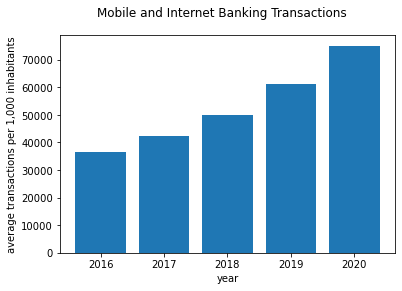

In [12]:
#bar graph for e-money usage
plt.bar('year', 'mobile_money', data = df_mm)
plt.xlabel('year')
plt.ylabel('average transactions per 1,000 inhabitants')
plt.suptitle('Mobile and Internet Banking Transactions')
plt.plot;

On average we observe growing usage of mobile and internet banking transactions over the years.

In [13]:
#average growth rates
df_mm['growth'] = df_mm['mobile_money'].pct_change()*100
print(df_mm)

     year  mobile_money     growth
0  2016.0  36514.479786        NaN
1  2017.0  42201.735723  15.575344
2  2018.0  50077.086776  18.661202
3  2019.0  61075.736796  21.963438
4  2020.0  75064.176305  22.903431


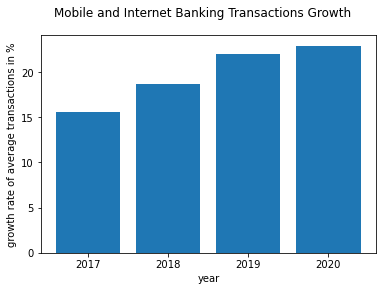

In [14]:
#bar graph growth rates
plt.bar('year', 'growth', data = df_mm)
plt.xlabel('year')
plt.ylabel('growth rate of average transactions in %')
plt.suptitle('Mobile and Internet Banking Transactions Growth')
plt.xticks([2017, 2018, 2019, 2020])
plt.plot;      

The growth rate is also increasing year over year which can be seen in the growing average growth rates of mobile and internet banking usage.

In [15]:
#%%covid descriptives
max_covid = max(df_2020['caseperpop'])
max_country = df_2020['country'][df_2020['caseperpop'] == max_covid].astype(str)
max_country = pc.country_alpha2_to_country_name(max_country.values[0])
print("Maximum: ", max_country, ": ", round(max_covid*1000,2))
min_covid = min(df_2020['caseperpop'])
min_country = df_2020['country'][df_2020['caseperpop'] == min_covid].astype(str)
min_country = pc.country_alpha2_to_country_name(min_country.values[0])
print("Minimum: ", min_country, ": ", round(min_covid*1000,2))
average = sum(df_2020['caseperpop'])/len(df_2020['caseperpop'])
print("Average: ", round(average*1000,2))
median = statistics.median(df_2020['caseperpop'])
print("Median: ", round(median,2)*1000)

Maximum:  Luxembourg :  74.88
Minimum:  Viet Nam :  0.02
Average:  24.82
Median:  20.0


The severity of the Covid pandemic also differs in our dataset. Whereas Luxembourg faced almost 75 infections per 1,000 inhabitants the same rate was only at 0.2 in Vietnam.

### Data Visualisation

In [16]:
#import geopandas
import geopandas as gpd

In [17]:
df_2020['country'] = df_2020['country'].astype(str)
codes = df_2020['country'].tolist()
alpha3 = []
for country in codes:
    country_name = pc.country_alpha2_to_country_name(country)
    country_code = pc.country_name_to_country_alpha3(country_name, cn_name_format="default")
    alpha3.append(country_code)
alpha3
df_2020['alpha3'] = None
df_2020['alpha3'] = alpha3

In [18]:
#download world data
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

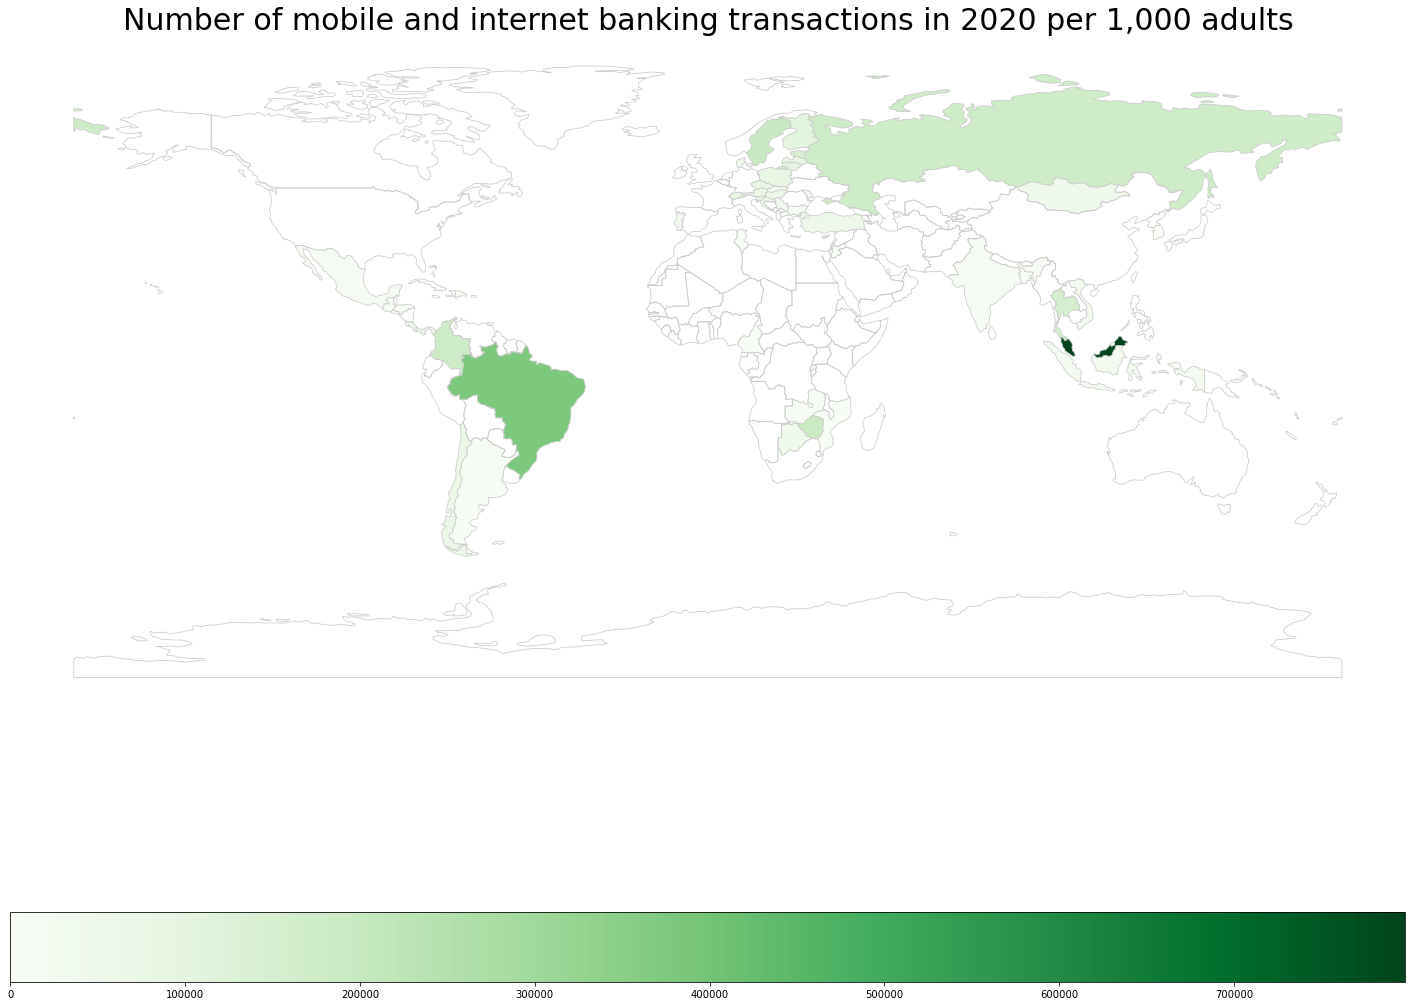

In [19]:
#e-money usage map for included countries
mapped = world.merge(df_2020[['alpha3', 'mobile_money']], how='left', left_on='iso_a3', right_on='alpha3')
#mapped = mapped.fillna(0)

to_be_mapped = 'mobile_money'
vmin, vmax = 0,df_2020['mobile_money'].max()
fig, ax = plt.subplots(1, figsize=(25,25))

mapped.plot(column=to_be_mapped, cmap='Greens', linewidth=0.8, ax=ax, edgecolors='0.8')
ax.set_title('Number of mobile and internet banking transactions in 2020 per 1,000 adults', fontdict={'fontsize':30})
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm, orientation='horizontal')

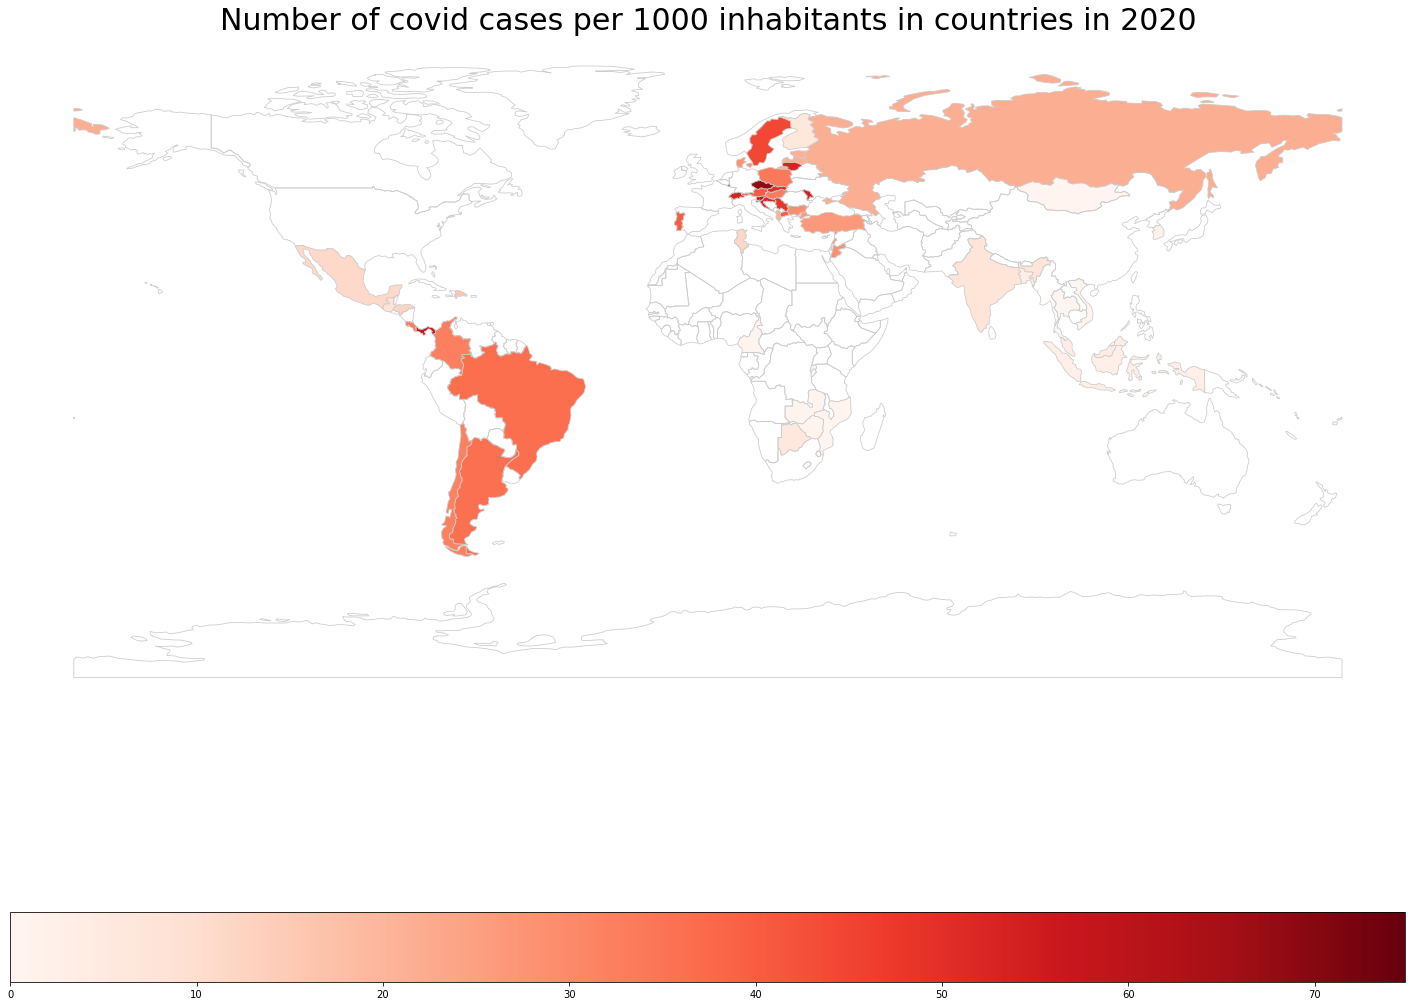

In [20]:
#Covid severity map for included countries
df_2020["caseperpop"] = df_2020["caseperpop"]*1000
mapped = world.merge(df_2020[['alpha3', 'caseperpop']], how='left', left_on='iso_a3', right_on='alpha3')
#mapped = mapped.fillna(0)

to_be_mapped = 'caseperpop'
vmin, vmax = 0,df_2020['caseperpop'].max()
fig, ax = plt.subplots(1, figsize=(25,25))

mapped.plot(column=to_be_mapped, cmap='Reds', linewidth=0.8, ax=ax, edgecolors='0.8')
ax.set_title('Number of covid cases per 1000 inhabitants in countries in 2020', fontdict={'fontsize':30})
ax.set_axis_off()

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar = fig.colorbar(sm, orientation='horizontal')

### Regression analysis

In our first regression we regressed the growth rate against dummy variables for our years to see if 2020 has had a statistically significant effect on the growth rates of mobile and internet transactions.

$ {Growth_t} = \alpha + \beta_{1} D_{2017} + \beta_{2} D_{2018} + \beta_{3} D_{2019} + \beta_{4} D_{2020}$

In [21]:
import statsmodels.formula.api as sm
#regression by year
results1 = sm.ols(formula = "growth ~ C(year)", data = df6).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.236
Date:                Thu, 13 Jan 2022   Prob (F-statistic):              0.298
Time:                        16:56:10   Log-Likelihood:                -138.35
No. Observations:                 220   AIC:                             284.7
Df Residuals:                     216   BIC:                             298.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2278      0.02

We do not find evidence that the year 2020 significantly affects growth rates.

For every regression we also include a control regression in which we also control for the last years usage of mobile and internet banking transactions.

$ {Growth_t} = \alpha + \beta_{1} D_{2017} + \beta_{2} D_{2018} + \beta_{3} D_{2019} + \beta_{4} D_{2020} + \beta_{4} Usage_{t-1}$

In [22]:
#regression by year checked for lagged usage
results1lag = sm.ols(formula = "growth ~ C(year) + mobile_money_lag", data = df6).fit()
print(results1lag.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.871
Date:                Thu, 13 Jan 2022   Prob (F-statistic):              0.117
Time:                        16:56:10   Log-Likelihood:                -136.46
No. Observations:                 220   AIC:                             282.9
Df Residuals:                     215   BIC:                             299.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2596      0.03

For our next analysis we use Covid as a dichotomous variable being 1 in 2020 and 0 otherwise to only extract the effect of Covid while controlling for our selection of countries (countries are included as dummy variables).

$ Growth_t = \alpha + \beta_1 Covid_t + \gamma D_{Country}$

In [23]:
#regression with covid dummy and countries
df6['covid'] = 0
df6['covid'] = np.where(df6['year'] == 2020, 1, df6['covid'])
results2 = sm.ols(formula="growth ~ covid + C(country)", data = df6).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     2.745
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           4.15e-07
Time:                        16:56:10   Log-Likelihood:                -68.431
No. Observations:                 220   AIC:                             248.9
Df Residuals:                     164   BIC:                             438.9
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2294      0.192  

Again, we do not find evidence of a significant effect of Covid on the growth rates of the utilisation of mobile and internet banking transactions.

In [24]:
#regression with covid dummy and countries checked for lagged usage
results2lag = sm.ols(formula="growth ~ covid + C(country) + mobile_money_lag", data = df6).fit()
print(results2lag.summary())


                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     2.828
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           1.71e-07
Time:                        16:56:10   Log-Likelihood:                -65.558
No. Observations:                 220   AIC:                             245.1
Df Residuals:                     163   BIC:                             438.6
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2210      0.190  

Controlling for the usage of mobile and internet banking transactions in the year prior significantly lowers the p-value of Covid but we still cannot find evidence of a significant effect at the 10% treshold. However, the coefficient suggests a positive effect of Covid on the growth rate with the 95% interval ranging from a negative growth rate of 6.7% up to an increase in growth by 18.1%.

In our final analysis we want to check whether the severity of the pandemic has had an effect on the adoption of mobile money and internet banking. We regress the growth rate against the Covid cases in a given country divided by its population.

$Growth = \alpha + \beta  CasesPerPopulation$

In [25]:
#regression on covid severity
df7 = df6[df6['year'] == 2020]
results3 = sm.ols(formula = "growth ~ caseperpop", data = df7).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.411
Date:                Thu, 13 Jan 2022   Prob (F-statistic):              0.126
Time:                        16:56:10   Log-Likelihood:                -20.491
No. Observations:                  55   AIC:                             44.98
Df Residuals:                      53   BIC:                             49.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3844      0.076      5.073      0.0

Again, we do not find evidence of an effect at the 10% treshold but the p-values for our final analysis are closer to 10% (12.6%) suggesting that higher case numbers lead to a decrease in the growth rates of mobile and internet banking transactions. This could potentially be explained by less economic activity in countries that were hit harder by the Covid pandemic.

In [26]:
#regression on covid severity checked for lagged usage
results3lag = sm.ols(formula = "growth ~ caseperpop + mobile_money_lag", data = df7).fit()
print(results3lag.summary())

                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.575
Date:                Thu, 13 Jan 2022   Prob (F-statistic):              0.217
Time:                        16:56:10   Log-Likelihood:                -20.098
No. Observations:                  55   AIC:                             46.20
Df Residuals:                      52   BIC:                             52.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4115      0.082  

Including the lagged usage of mobile and internet banking transactions does not change the implications from the regression as the coefficient and the p-value almost stay the same.